In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('datasets/BCG Financial Data.csv')
df.head()

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Microsoft,2024,2.450000e+11,8.810000e+10,5.120000e+11,2.440000e+11,1.190000e+11
1,Microsoft,2023,2.120000e+11,7.240000e+10,4.120000e+11,2.060000e+11,8.760000e+10
2,Microsoft,2022,1.980000e+11,7.270000e+10,3.650000e+11,1.980000e+11,8.900000e+10
3,Apple,2024,3.910000e+11,9.370000e+10,3.650000e+11,3.080000e+11,1.180000e+11
4,Apple,2023,3.830000e+11,9.700000e+10,3.530000e+11,2.900000e+11,1.110000e+11


In [40]:
df.dtypes

Company                                 object
Fiscal Year                              int64
Total Revenue                          float64
Net Income                             float64
Total Assets                           float64
Total Liabilities                      float64
Cash Flow from Operating Activities    float64
dtype: object

In [41]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100
df['Total Assets Growth (%)'] = df.groupby(['Company'])['Total Assets'].pct_change() * 100
df['Total Liabilities Growth (%)'] = df.groupby(['Company'])['Total Liabilities'].pct_change() * 100
df['Cash Flow from Operating Activites Growth (%)'] = df.groupby(['Company'])['Cash Flow from Operating Activities'].pct_change() * 100

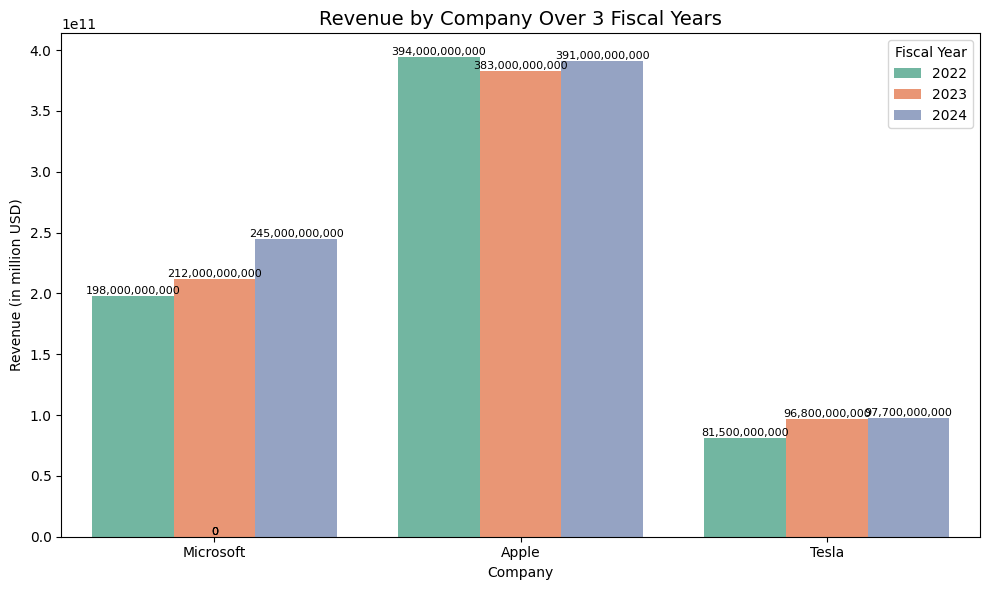

In [43]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=df, x="Company", y="Total Revenue", hue="Fiscal Year", palette="Set2")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height):,}',
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.title("Revenue by Company Over 3 Fiscal Years", fontsize=14)
plt.ylabel("Revenue (in million USD)")
plt.xlabel("Company")
plt.legend(title="Fiscal Year")
plt.tight_layout()
plt.show()

### Revenue Trends
* Apple consistently maintains the highest revenue among the three companies averaging around $390 billion
* Microsoft indicates solid consistent growth over the years
* Tesla's growth initially was quite a lot with an increase of around $15 billion but then remained stagnant in 2024

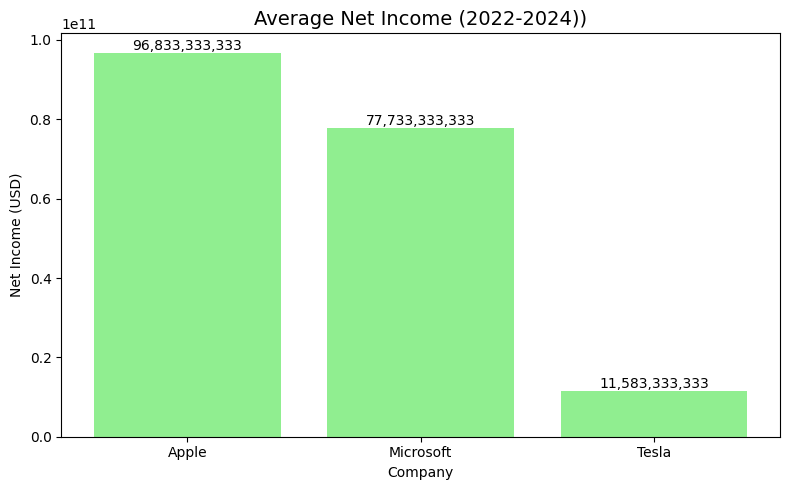

In [48]:
avg_net_income = df.groupby("Company")["Net Income"].mean().reset_index()
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_net_income["Company"], avg_net_income["Net Income"], color="lightgreen")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1000, f"{int(yval):,}", 
             ha='center', va='bottom', fontsize=10)

plt.title("Average Net Income (2022-2024))", fontsize=14)
plt.ylabel("Net Income (USD)")
plt.xlabel("Company")
plt.tight_layout()
plt.show()

### Net Income Trends
* Apple maintains the highest net income on average hitting almost $100 billion 
* Apple and Microsoft indicated high average net incomes over time
* Tesla had a sharp increase in net income between 2022 and 2023, but it fell again in 2024

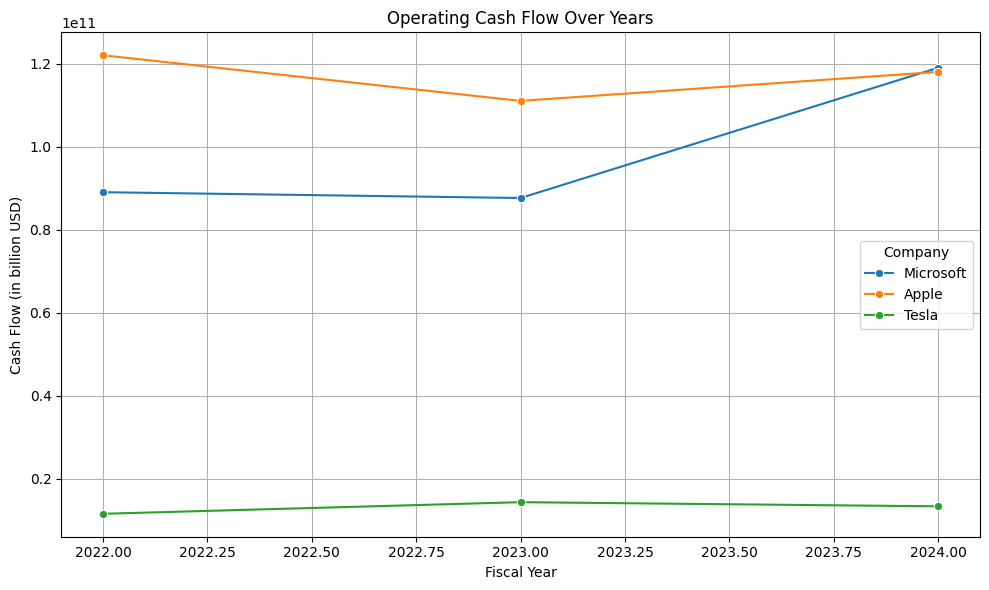

In [53]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Fiscal Year", y="Cash Flow from Operating Activities", hue="Company", marker="o")
plt.title("Operating Cash Flow Over Years")
plt.ylabel("Cash Flow (in billion USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

### Cash Flow Trends
* Apple initially had the highest cash flow in 2022, but Microsoft overtakes it slightly by 2024 with Apple's overall cash flow decreasing slightly by 2024
* Tesla's cash flow remains consistent and increased ever slightly in 2023 but decreased by 2024

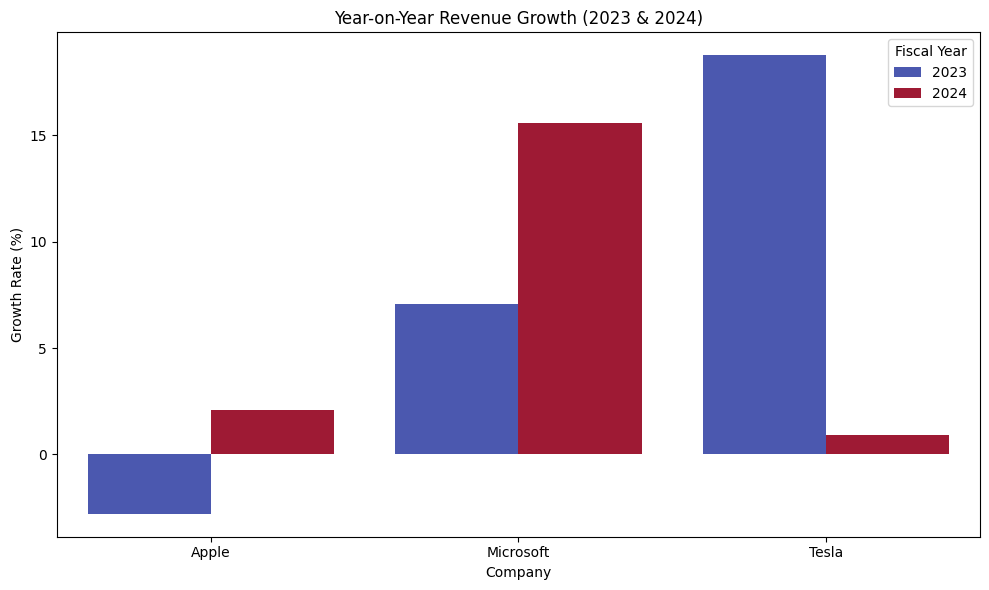

In [58]:
# Only keep rows for 2023 and 2024 (where growth is not NaN)
growth_years = df_growth[df_growth["Fiscal Year"].isin([2023, 2024])]

plt.figure(figsize=(10, 6))
sns.barplot(data=growth_years, x="Company", y="Revenue Growth (%)", hue="Fiscal Year", palette="coolwarm")
plt.title("Year-on-Year Revenue Growth (2023 & 2024)")
plt.ylabel("Growth Rate (%)")
plt.tight_layout()
plt.show()


### Revenue Growth Trends
* Apple initially had negative growth but came up and grew back in 2024
* Microsoft indicated consistent positive revenue growth
* Tesla initially had the highest growth rate in 2023 but fell sharply in 2024 with the most significant decrease out of the three companies

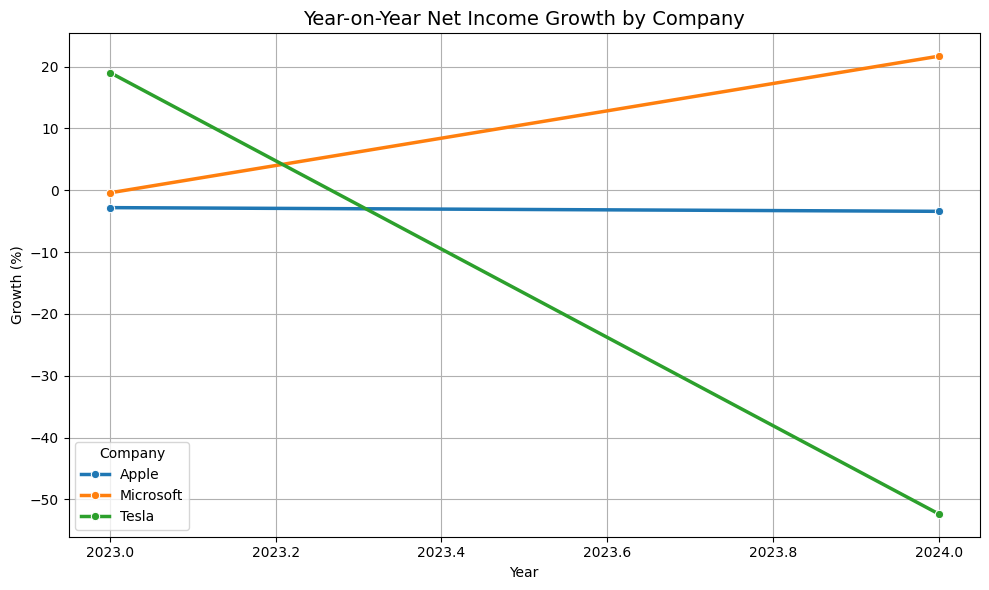

In [62]:
df_income = df.copy()
df_income.sort_values(["Company", "Fiscal Year"], inplace=True)

df_income["Net Income Growth (%)"] = df_income.groupby("Company")["Net Income"].pct_change() * 100
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_income, x="Fiscal Year", y="Net Income Growth (%)", hue="Company", marker="o", linewidth=2.5)

plt.title("Year-on-Year Net Income Growth by Company", fontsize=14)
plt.ylabel("Growth (%)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

### Net Income Growth Trends
* Apple had a consistent negative growth rate in income
* Microsoft was the only company with an increase in income rate growth over the year
* Tesla had a sharp decrease in income rate growth falling from the highest growth rate out of the three to the lowest